# Notebook для лаб

Настоящий ноутбук используется для более-менее автоматизированной обработки лаб. В коде ниже необходимо последовательно задавать значения переменных, а затем радоваться на выходе красивым графикам. При необходимости весь код можно запускать отдельно от ноутбука (достаточно его просто скопировать в интерпретатор).

In [29]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
from scipy.interpolate import interp1d
import pandas as pd

Имя файла с экспериментальными данными (формата csv). Из него будем брать весь эксперимент

In [30]:
input_file = './sample_input.txt'

Столбцы, которые принять за x и за y

In [31]:
x_data = 'I'
y_data = 'V'

Технический код. Считываем данные и ищем максимум из них.

In [32]:
frame = pd.read_csv(input_file)

x = frame[[x_data]]
y = frame[[y_data]]

y_max = np.max(y)[0]
y_min = np.min(y)[0]
x_max = np.max(x)[0]
x_min = np.min(x)[0]

Теперь попытаемся найти лучший размера для одного tick. Для этого мы переберем несколько вариантов и отберем тот, что делает число major_ticks от 0 до 10.

TODO: улучшить этот алгоритм

In [33]:
major_ticks_variants = [5 * 10 ** (n) for n in range(-8, 8)]

# Ищем лучший вариант для major_ticks (чтобы были через 5 и чтобы все изменерия там поместились)

best_x_variant = major_ticks_variants[0]
best_y_variant = major_ticks_variants[0]

for variant in major_ticks_variants:
    if 0 < (x_max - x_min) / variant <= 10:
        best_x_variant = variant
        break

for variant in major_ticks_variants:
    if 0 < (y_max - y_min) / variant <= 10:
        best_y_variant = variant
        break

Объявим Locator для обоих осей

In [34]:
xmajorLocator = MultipleLocator(best_x_variant)
ymajorLocator = MultipleLocator(best_y_variant)

Введите сюда число minor_ticks. В большинстве случаев сойдет число 4 или 5

In [35]:
number_of_minor_ticks = 5

Теперь объявляем minor_locator

In [36]:
xminorLocator = MultipleLocator(best_x_variant / number_of_minor_ticks)
yminorLocator = MultipleLocator(best_y_variant / number_of_minor_ticks)

Почти готово! Осталось создать figure, где мы будем рисовать и настроить его

In [37]:
fig, ax = plt.subplots()

# set Locators
ax.xaxis.set_minor_locator(xminorLocator)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_major_locator(xmajorLocator)
ax.yaxis.set_major_locator(ymajorLocator)

TODO: сделать интерполяцию.

Создаем график по экспериментальным точкам

In [38]:
plt.plot(x, y, '--', color='k')

Наносим на него ticks

In [39]:
plt.grid(which='major', ls='-', lw=0.5, c='k')
plt.grid(which='minor', ls='--', lw=0.5, c='grey')

Сохраняем результат

In [40]:
plt.savefig("out_graph.png")

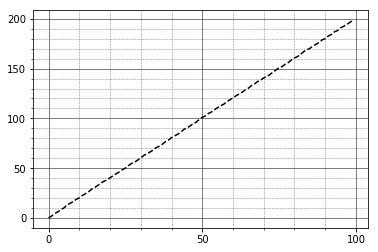

In [41]:
plt.show()